In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

In [2]:
import sys
# needed to make other modues in util, ..., etc. visible
sys.path.append('..')

In [3]:
from util.convenientio import ConvenientIO
cio = ConvenientIO(project_root = '../')
train = cio.load_csv_as_DataFrame('train.csv')
test = cio.load_csv_as_DataFrame('test.csv')


In [4]:
train.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


In [5]:
def find_na(data):
    result = {}
    size = len(data)
    for key in data.keys():
        key_size = data.count()[key]
        if key_size < size:
            result[key] = ["missing entries, only " + str(key_size) + " of " + str(size) + " given"]
        else:
            result[key] = ["no missing entries"]
    return result

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [7]:
remarks = find_na(train)

In [8]:
remarks["id"].append("ignore, useless")

In [9]:
train["belongs_to_collection"][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [10]:
remarks["belongs_to_collection"].append('maybe binary category, yes or no...')

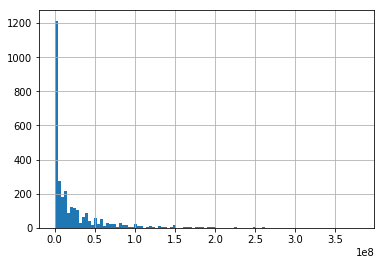

In [11]:
train["budget"].hist(bins=100)

In [12]:
remarks["budget"].append('numeric input') 

In [13]:
train["genres"].head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

In [14]:
remarks["genres"].append('categorical input, e.g. Comedy, Thriller, etc')


In [15]:
train["homepage"].head(10)

0                                   NaN
1                                   NaN
2     http://sonyclassics.com/whiplash/
3            http://kahaanithefilm.com/
4                                   NaN
5                                   NaN
6    http://www.thepossessionmovie.com/
7                                   NaN
8                                   NaN
9                                   NaN
Name: homepage, dtype: object

In [16]:
remarks["homepage"].append('convert to boolean input -> has homepage, yes or no')

In [17]:
train["imdb_id"].head()

0    tt2637294
1    tt0368933
2    tt2582802
3    tt1821480
4    tt1380152
Name: imdb_id, dtype: object

In [18]:
remarks["imdb_id"].append("ignore for the moment, no idea what this is about?")

In [19]:
train["original_language"].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
da       5
fa       5
ro       4
tr       3
hu       3
pl       2
ml       2
no       2
te       2
fi       2
vi       1
nb       1
ar       1
bn       1
el       1
ur       1
id       1
sr       1
mr       1
cs       1
he       1
Name: original_language, dtype: int64

In [20]:
remarks["original_language"].append("categorical input")
remarks["original_language"].append("a lot of languages appear only once or twice in the data set, \
maybe its a good idea to put all languages with counts below a certain threshold into one 'others' class.\
to prevent overfitting!")

In [21]:
train[["original_title","title"]].head()

,original_title,title
0,Hot Tub Time Machine 2,Hot Tub Time Machine 2
1,The Princess Diaries 2: Royal Engagement,The Princess Diaries 2: Royal Engagement
2,Whiplash,Whiplash
3,Kahaani,Kahaani
4,마린보이,Marine Boy


In [22]:
remarks["original_title"].append("ignore")
remarks["original_title"].append("title in original language, for example chinese etc...")

In [23]:
remarks["overview"].append("ignore")
remarks["overview"].append("short summary of the content")

In [24]:
train["popularity"].head()

0     6.575393
1     8.248895
2    64.299990
3     3.174936
4     1.148070
Name: popularity, dtype: float64

In [25]:
remarks["popularity"].append("numerical input")
remarks["popularity"].append("assumption, higher score -> more pulular, what ever popular means")

In [26]:
train['production_companies'][0]

"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]"

In [27]:
remarks['production_companies'].append("categorical input")
remarks['production_companies'].append("list of dicts with keys 'name' and 'id' per production company")
remarks['production_companies'].append("-> use id as categorical variable (one-hot encoding)")
remarks['production_companies'].append("to prevent overfitting also here only companies with a count above a certain \
threshold should be seen as individal category, put the rest into 'others'")

In [28]:
train['production_countries'].head()

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3              [{'iso_3166_1': 'IN', 'name': 'India'}]
4        [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
Name: production_countries, dtype: object

In [29]:
remarks['production_countries'].append('categorical input')
remarks['production_countries'].append('list of dicts with keys "name" and "iso_3166_1", use iso code as category identifier.')
remarks['production_countries'].append('again take care of overfitting by using only categories above a certain count threshold')

In [30]:
train["release_date"].head()

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

In [31]:
remarks["release_date"].append("very interesting input, the date of movie release.")
remarks["release_date"].append("on the one hand, how old is the movie \
it might be easier to get a bigger revenue today compared to the 80s.")
remarks['release_date'].append('on the other hand, wich part of the yeas was the release. \
around christmas everybody is going to the cinema! during summer not')
remarks["release_date"].append("maybe lets split in two parts -> #1 numerical input year,\
 #2 numerical input ? day of year/month of year ?, but linear growing")

In [32]:
train["runtime"].head()

0     93.0
1    113.0
2    105.0
3    122.0
4    118.0
Name: runtime, dtype: float64

In [33]:
remarks["runtime"].append("numerical input")
remarks["runtime"].append("how many minutes has the movie")


In [34]:
train["spoken_languages"]

0                [{'iso_639_1': 'en', 'name': 'English'}]
1                [{'iso_639_1': 'en', 'name': 'English'}]
2                [{'iso_639_1': 'en', 'name': 'English'}]
3       [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4                [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
5                [{'iso_639_1': 'en', 'name': 'English'}]
6                [{'iso_639_1': 'en', 'name': 'English'}]
7       [{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...
8                [{'iso_639_1': 'en', 'name': 'English'}]
9                [{'iso_639_1': 'en', 'name': 'English'}]
10               [{'iso_639_1': 'en', 'name': 'English'}]
11               [{'iso_639_1': 'en', 'name': 'English'}]
12               [{'iso_639_1': 'en', 'name': 'English'}]
13      [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
14      [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
15                [{'iso_639_1': 'sr', 'name': 'Srpski'}]
16      [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
17            

In [35]:
remarks["spoken_languages"].append("categorical input")
remarks["spoken_languages"].append("list of dicts, use iso code for language")
remarks["spoken_languages"].append("again, only use languages down to a certain count in oder\
                                   to prevent overfitting")

In [36]:
train["status"].value_counts()


Released    2996
Rumored        4
Name: status, dtype: int64

In [37]:
remarks["status"].append("categorical input")
remarks["status"].append("released or not")


In [38]:
train["tagline"].head()


0    The Laws of Space and Time are About to be Vio...
1    It can take a lifetime to find true love; she'...
2      The road to greatness can take you to the edge.
3                                                  NaN
4                                                  NaN
Name: tagline, dtype: object

In [39]:
remarks["tagline"].append("ignore, probably not useful without NLP")

In [40]:
train["title"].head()

0                      Hot Tub Time Machine 2
1    The Princess Diaries 2: Royal Engagement
2                                    Whiplash
3                                     Kahaani
4                                  Marine Boy
Name: title, dtype: object

In [41]:
remarks["title"].append("ignore for the moment")
remarks["title"].append("maybe use later in some abstract way. how long is the title,..., etc.?")

In [42]:
train["Keywords"][1]

"[{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]"

In [43]:
remarks["Keywords"].append("categorical input")
remarks["Keywords"].append("list of dicts, keys id and name. use id -> int value")
remarks["Keywords"].append("again only use most frequent to prevent overfitting")

In [44]:
train["cast"][0]

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

In [45]:
remarks["cast"].append("list of dicts, use several keys")
remarks["cast"].append("order -> numeric input, the lower the higher the imoprtance (!!Assumption!!)")
remarks["cast"].append("id -> categorical input, who is it. again only most freqeunt to prevent overfitting\
                       use in combination with order as weight?")
remarks["cast"].append("gender -> categorical input, also in combination with order as weight?")


In [46]:
train["crew"][0]

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

In [47]:
remarks["crew"].append("ignore for the moment, very complicated")


In [48]:
train["revenue"].head()

0    12314651
1    95149435
2    13092000
3    16000000
4     3923970
Name: revenue, dtype: int64

In [49]:
remarks["revenue"].append("to be predicted")

In [50]:
def show_remarks(remarks):
    for feature, f_remarks in remarks.items():
        print(feature)
        print("_ _ "*20)
        for remark in f_remarks:
            print(remark)
        print("#"*40)
        print()


In [51]:
show_remarks(remarks)

id
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
no missing entries
ignore, useless
########################################

belongs_to_collection
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
missing entries, only 604 of 3000 given
maybe binary category, yes or no...
########################################

budget
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
no missing entries
numeric input
########################################

genres
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
missing entries, only 2993 of 3000 given
categorical input, e.g. Comedy, Thriller, etc
########################################

homepage
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
missing entries, only 946 of 3000 given
convert to boolean input -> has homepage, yes or no
########################################

imdb_id
_ _ _ 

## Have a look at numeric inputs

In [52]:
train.corr()["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
id            0.000610
Name: revenue, dtype: float64

In [53]:
remarks["budget"].append("strong correlation with revenue -> 0.75")
remarks["popularity"].append("correlation with revenue -> 0.46")
remarks["runtime"].append("slight correlation with revenue -> 0.21")

In [54]:
from pandas.plotting import scatter_matrix

[]

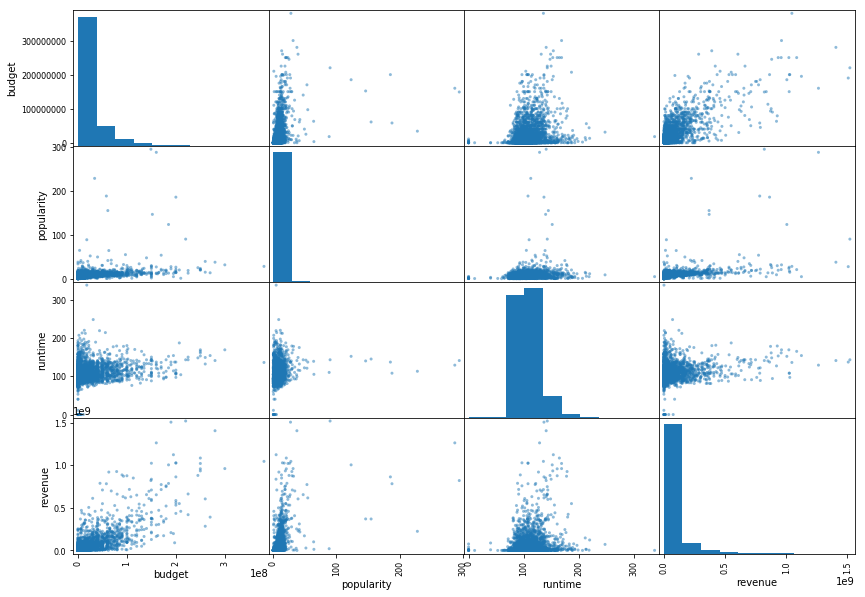

In [55]:
scatter_matrix(train[["budget", "popularity", "runtime", "revenue"]], figsize=(14,10))
plt.plot()

[]

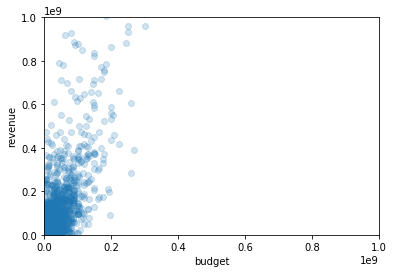

In [56]:
plt.scatter(train["budget"], train["revenue"], alpha = 0.2)
plt.axis([0,1e9,0,1e9])
plt.ylabel("revenue")
plt.xlabel("budget")
plt.plot()

In [57]:
remarks["budget"].append("linear correlation, however random fluctuations in the order of 100% for most of the data points")

In [58]:
remarks["budget"].append("a lot of data points with high revenue and zero budget, take care of these!")

[]

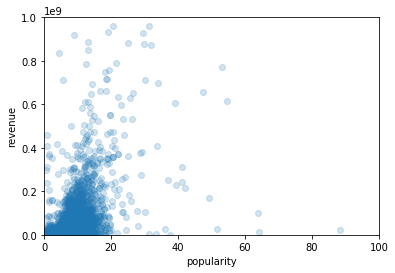

In [59]:
plt.scatter(train["popularity"], train["revenue"], alpha = 0.2)
plt.axis([0,100,0,1e9])
plt.ylabel("revenue")
plt.xlabel("popularity")
plt.plot()

In [60]:
remarks["popularity"].append("not at all linear, somhow gaussian like right skewed distribution")

[]

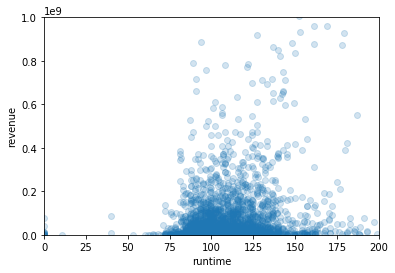

In [61]:
plt.scatter(train["runtime"], train["revenue"], alpha = 0.2)
plt.axis([0,200,0,1e9])
plt.ylabel("revenue")
plt.xlabel("runtime")
plt.plot()

In [62]:
remarks["runtime"].append("not at all linear, gaussian like with mean at approx. 100 - 120 min")

In [63]:
show_remarks(remarks)

id
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
no missing entries
ignore, useless
########################################

belongs_to_collection
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
missing entries, only 604 of 3000 given
maybe binary category, yes or no...
########################################

budget
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
no missing entries
numeric input
strong correlation with revenue -> 0.75
linear correlation, however random fluctuations in the order of 100% for most of the data points
a lot of data points with high revenue and zero budget, take care of these!
########################################

genres
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
missing entries, only 2993 of 3000 given
categorical input, e.g. Comedy, Thriller, etc
########################################

homepage
_ _ _ _ _ _ _ _ 